In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [10]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [4]:
urls = [
    "https://langchain-ai.github.io/langgraph/guides/",
    "https://langchain-ai.github.io/langgraph/agents/overview/",
    "https://langchain-ai.github.io/langgraph/agents/run_agents/"
]

In [7]:
docs = [WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/guides/', 'title': 'Guides', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\nGuides\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Guides\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n 

In [8]:
doc_list=list()
for sublist in docs:
    for item in sublist:
        doc_list.append(item)

#doc_list = [item for sublist in docs for item in sublist]

doc_list

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/guides/', 'title': 'Guides', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\nGuides\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Guides\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Reference\n\n        \n\n\n\n          \n  

In [11]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size = 1000 , chunk_overlap = 200)

doc_splits = text_splitter.split_documents(doc_list)

In [12]:
vectorstore = FAISS.from_documents(documents=doc_list,embedding=OpenAIEmbeddings())

retriver = vectorstore.as_retriever()

In [13]:
retriver.invoke("what is lang graph")

[Document(id='b3ad2380-68a6-4d52-bc8c-20fc68f16d6e', metadata={'source': 'https://langchain-ai.github.io/langgraph/guides/', 'title': 'Guides', 'description': 'Build reliable, stateful AI systems, without giving up control', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\nGuides\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n          Skip to content\n        \n\n\n\n\n\n\n\n            \n            \nOur Building Ambient Agents with LangGraph course is now available on LangChain Academy!\n\n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            LangGraph\n          \n\n\n\n            \n              Guides\n            \n          \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n            Initializing search\n          \n\n\n\n\n\n\n\n\n\n\n\n\n    GitHub\n  \n\n\n\n\n\n\n\n\n\n\n          \n  \n  \n    \n  \n  Get started\n\n        \n\n\n\n          \n  \n  \n    \n  \n  Guides\n\n        \n\n\n\n          \n  \n  \n    \n  \n  

In [17]:
from langchain.tools.retriever import create_retriever_tool

retriver_tool = create_retriever_tool(retriver,"retriver_vector_langgraph_blog","search and run information about langgraph")

### langchain blogs

In [15]:
urls = [
    "https://python.langchain.com/docs/introduction/",
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/how_to/"
]

In [16]:
docs = [WebBaseLoader(url).load() for url in urls]
docs

doc_list=list()
for sublist in docs:
    for item in sublist:
        doc_list.append(item)

doc_splits = text_splitter.split_documents(doc_list)

vectorstore_langchain = FAISS.from_documents(documents=doc_list,embedding=OpenAIEmbeddings())
retrival_langchain = vectorstore_langchain.as_retriever()

In [18]:
retrival_tool_langchain = create_retriever_tool(
    retrival_langchain,
    "retriver_tool_langgrah_blog",
    "search and run information about langgraph"
)

In [21]:
tools = [retrival_tool_langchain,retriver_tool]

In [19]:
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages
from typing import Annotated,Sequence
from langchain_core.messages import BaseMessage

class AgentState(TypedDict):
    messages:Annotated[Sequence[BaseMessage],add_messages]

In [20]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")

In [22]:
def agent(state:AgentState):

    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    model = llm.bind_tools(tools)
    message =state["messages"]
    return {"messages":[model.invoke(message)]}

In [23]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [27]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatOpenAI(model = "gpt-4o")
    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [25]:
prompt = hub.pull("rlm/rag-prompt")
print(prompt)

c:\Users\Administrator\Desktop\1602_24_733_186\AGENTICWORKSPACE\myenv\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


input_variables=['context', 'question'] input_types={} partial_variables={} metadata={'lc_hub_owner': 'rlm', 'lc_hub_repo': 'rag-prompt', 'lc_hub_commit_hash': '50442af133e61576e74536c6556cefe1fac147cad032f4377b60c436e6cdcb6e'} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template="You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:"), additional_kwargs={})]


In [28]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    model = ChatOpenAI(model = "gpt-4o")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [29]:
print(""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """)

 
 
    Look at the input and try to reason about the underlying semantic intent / meaning. 
 
    Here is the initial question:
    
 ------- 

    {question} 
    
 ------- 

    Formulate an improved question: 


In [30]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    model = ChatOpenAI(model = "gpt-4o")
    response = model.invoke(msg)
    return {"messages": [response]}


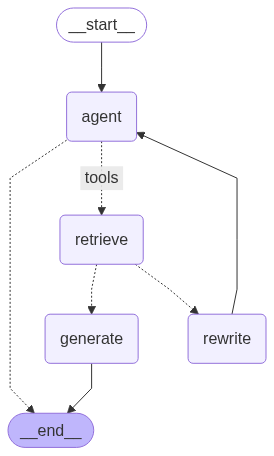

In [31]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode(tools=tools)
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [32]:
graph.invoke({"messages":"What is Langgraph?"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


c:\Users\Administrator\Desktop\1602_24_733_186\AGENTICWORKSPACE\myenv\Lib\site-packages\langsmith\client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='595fefea-ec18-4582-828d-6a6c573c89a5'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_q5JBr6uvZrXJotf8C3AJuyf1', 'function': {'arguments': '{"query": "Langgraph"}', 'name': 'retriver_tool_langgrah_blog'}, 'type': 'function'}, {'id': 'call_tFJ5eThYE5hYJpN2dUPypIgZ', 'function': {'arguments': '{"query": "Langgraph"}', 'name': 'retriver_vector_langgraph_blog'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 57, 'prompt_tokens': 99, 'total_tokens': 156, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BybR9Pto9NTgZ1bvh7nUHzC33RdDZ', 'service_tier': 'default', 'finish_reas